# Facebook Messenger Stats!

In [1]:
%matplotlib inline

import JSON_message_parser, os, stats
import datetime

#create path for csv files to be saved
if not os.path.exists('.\\csv files'):
	os.mkdir('.\\csv files\\')

**Parse all your data into a dict to be manipulated**

This may take a while!

In [2]:
chat_dict, totals = JSON_message_parser.parse() #parses all by default. can parse single html files
stats.setTotals(totals)

# Who do you talk to most?

First, let's find your chats with the most messages!
getMostMessaged takes 2 arguments: dict of your chats and how many chats to display

In [3]:
df_most_messaged = stats.getMostMessaged(chat_dict, 10)
df_most_messaged

,% of total messages,chat,number of messages,rank
0,13.871468,Shabab Ayub,63944,1
1,7.629698,Rena Chen,35171,2
2,7.429470,confession bois and simon,34248,3
3,7.342698,Meagan Liu,33848,4
4,6.109876,Dilip Rathinakumar,28165,5
5,5.626986,Andrew Tran,25939,6
6,5.398991,JP Roasting Society PT.3,24888,7
7,3.659634,The best eng (misc),16870,8
8,2.632247,JP roasting society,12134,9
9,1.948045,Brandon Tran,8980,10


Now let's plot this data:

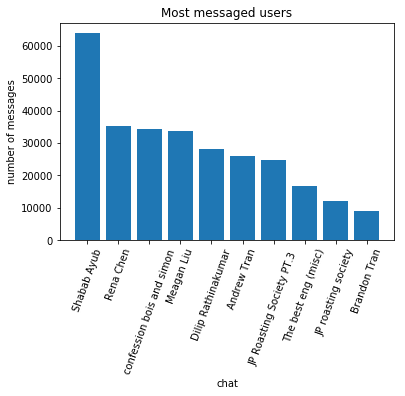

In [4]:
x = 'chat'
y = 'number of messages' #or plot '% of total messages'
data = df_most_messaged
plot_title = 'Most messaged users'
stats.plot(x,y, data, plot_title)

Of the people you talk to most, who sends the longest messages?

Let's see who sends the most **words** per message:

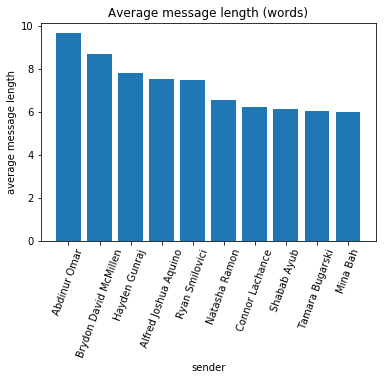

,average message length,rank,sender
0,9.652344,1,Abdinur Omar
1,8.686833,2,Brydon David McMillen
2,7.800000,3,Hayden Gunraj
3,7.545455,4,Alfred Joshua Aquino
4,7.476190,5,Ryan Smilovici
5,6.564205,6,Natasha Ramon
6,6.201754,7,Connor Lachance
7,6.117181,8,Shabab Ayub
8,6.029116,9,Tamara Bugarski
9,5.991622,10,Mina Bah


In [5]:
most_active_chats = df_most_messaged['chat']

df_lengthiest_sender = stats.getAverageMessageLength(chat_dict, len(most_active_chats), most_active_chats, typeLen='words')

stats.plot('sender', 'average message length', df_lengthiest_sender, 'Average message length (words)')
df_lengthiest_sender


What about most **characters** per message?

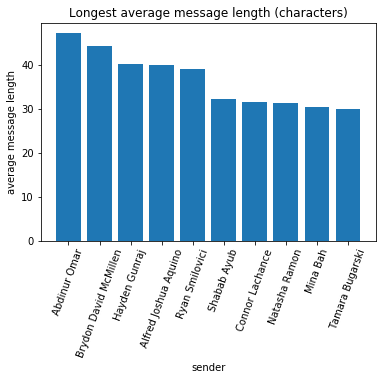

,average message length,rank,sender
0,47.269531,1,Abdinur Omar
1,44.348754,2,Brydon David McMillen
2,40.400000,3,Hayden Gunraj
3,40.181818,4,Alfred Joshua Aquino
4,39.095238,5,Ryan Smilovici
5,32.337969,6,Shabab Ayub
6,31.701754,7,Connor Lachance
7,31.373253,8,Natasha Ramon
8,30.469779,9,Mina Bah
9,30.091365,10,Tamara Bugarski


In [6]:
df_lengthiest_sender = stats.getAverageMessageLength(chat_dict, len(most_active_chats), most_active_chats, typeLen='chars')

stats.plot('sender', 'average message length', df_lengthiest_sender, 'Longest average message length (characters)')
df_lengthiest_sender

# When are you procrastinating the most?

Now let's look at your most active times on Facebook Messenger: 

We can compare most active time, minute, hour, day, month, or year using stats.getMostActiveTime

However, the most active minute, day and time are usually boring and uniform.


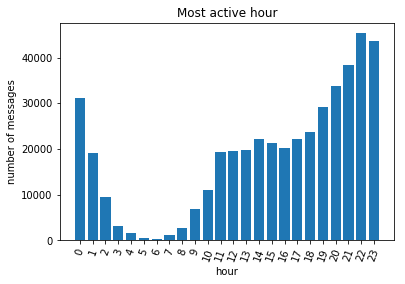

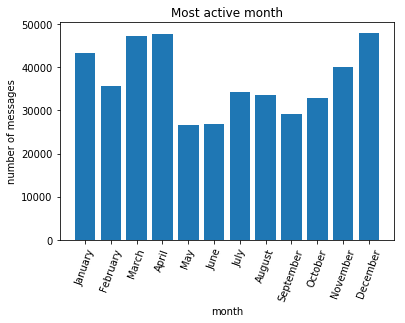

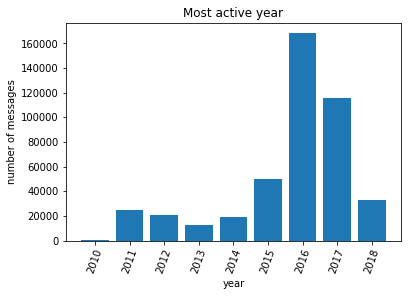

In [7]:
#stats.getMostActiveTime takes arguments chat dictionary, number of items to display ('max' to display all), type of time

df_hour = stats.getMostActiveTime(chat_dict, 'max', "hour")
df_hour = df_hour.sort_values('hour', ascending=True)

df_year = stats.getMostActiveTime(chat_dict,'max', "year")
df_year = df_year.sort_values('year', ascending=True)

df_month = stats.getMostActiveTime(chat_dict, 12, "month")
months = {datetime.datetime(2000,i,1).strftime("%B"): i for i in range(1, 13)}
df_month["month_number"] = df_month["month"].map(months)
df_month = df_month.sort_values('month_number', ascending=True)

stats.plot('hour','number of messages', df_hour, 'Most active hour')
stats.plot('month','number of messages', df_month, 'Most active month')
stats.plot('year','number of messages', df_year, 'Most active year')

# What are you sending to people?

What are your most sent words? Let's find out:


In [8]:
topNum = 10 #how many words to display (i.e. topNum = 10 displays top 10 words)
chars = 4 #the minimum length of the words, single letter words are boring!
sender = 'Simon Wong' #can use any name to find the most used words from a certain sender. or 'ANY_SENDER' for any sender
df_words = stats.getMostUsedWords(chat_dict, topNum, sender, chars)
df_words



,% of total messages,number of uses,rank,word
0,1.284451,5921,1,that
1,1.241282,5722,2,like
2,1.071859,4941,3,yeah
3,0.964261,4445,4,what
4,0.870763,4014,5,have
5,0.853192,3933,6,this
6,0.827160,3813,7,just
7,0.811758,3742,8,lmao
8,0.706763,3258,9,with
9,0.614133,2831,10,they


# How are you communicating?

See your breakdown between text, image, video and stickers!

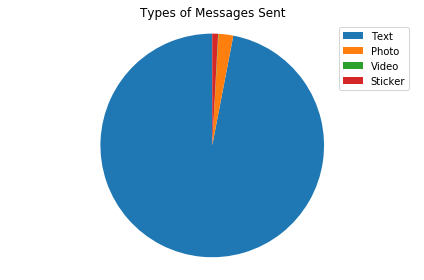

,% of total messages,number of messages,type of message
0,0.840114,3743,stickers
1,2.122841,9458,photos
2,0.058581,261,videos
3,96.978464,432073,text


In [9]:
df_type = stats.typesOfMessages(chat_dict, 'ANY_CHAT')
df_type

In [10]:
df_most_common = stats.inMostGroupChats(chat_dict, 10)
df_most_common

,% of total chats,number of group chats,participant,rank
0,7.129799,39,Kevin Nguyen,1
1,5.850091,32,Tommy Huynh,2
2,5.667276,31,Huthman Yuvarajan,3
3,4.936015,27,Tenzin Thinley,4
4,4.753199,26,Brandon Tran,5
5,3.473492,19,Tenzin Kunkhen,6
6,3.290676,18,Dilip Rathinakumar,7
7,3.107861,17,Tashi Namgyal,8
8,2.925046,16,Facebook User,9
9,2.925046,16,Shabab Ayub,10


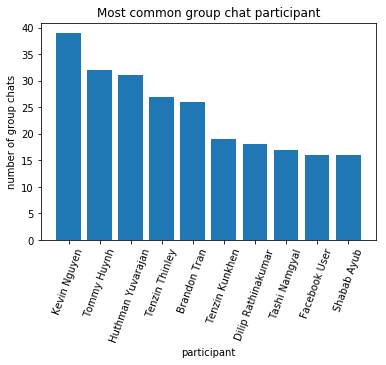

In [11]:
stats.plot('participant','number of group chats', df_most_common, 'Most common group chat participant')